### Breast Cancer Detection Using Support Vector Machines (SVM) and Multilayer Perceptron (MLP)

In this exercise, you will use SVM to classify whether a patient has benign or malignant cancer cells using the given breast cancer dataset. 

Fill in the required code for the exercise in Jupyter Notebook. Be sure to run the entire notebook so that the results are shown. Rename the notebook with your last name and submit.

### Import libraries and dataset

In [161]:
import pandas as pd
import numpy as np

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Prepare the dataset for training and testing

In [162]:
# Write code here to generate the train and test sets. (1 point)
data = data.dropna()
#print(data.head())

X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values                                                # independent variables
y = data.iloc[:,13].values                                                                          # dependent variables

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=202006914)  

### Normalize the data
StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1.

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and test the model 

In [164]:
# Write code here to train the model.(2 points)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8131868131868132

### Evaluating the model

### Generate the confusion matrix

Text(113.9222222222222, 0.5, 'true value')

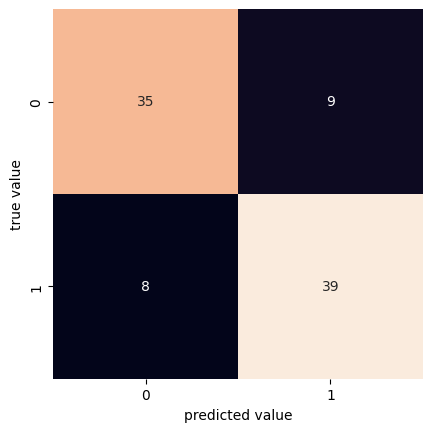

In [165]:
# Write code here to generate the confusion matrix (1 point)
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

### Print the classification report

In [166]:
# Write code here to print the classification report (1 point)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        44
           1       0.81      0.83      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Improve the model by hyperparameter tuning. Use GridSearchCV.

In [167]:
# Write code here to tune your hyperparameter. You can decide what parameter and values to use. (5 points)
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)



Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.791 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.721 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.674 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             verbose=3)

### Show the best parameters found and use them to generate the predictions.

In [168]:
# Write code here to show the best parameter found and then generate the predictions using these. (2 points)
grid.best_params_
grid_predictions = grid.predict(X_test)
accuracy_score(y_test, grid_predictions)

0.8461538461538461

### Display the confusion matrix 

Text(113.9222222222222, 0.5, 'true value')

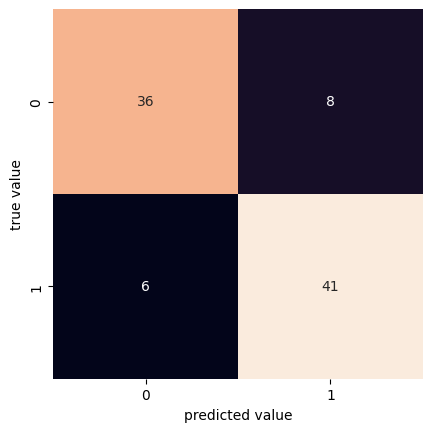

In [169]:
# Write code here to display the confusion matrix of the new results. (1 point)

mat = confusion_matrix(y_test,grid_predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

### Display the classification report

In [170]:
# Write code here to print the classification report of the model with the best parameter found. (1 point)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



### Conclusion

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

parameters = [:,[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
x = sc.transform(parameters)
y = svc_model.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.